<a href="https://colab.research.google.com/github/peaceful-1/peaceful/blob/main/Open_Source_Models%2BWith%2BHuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CAPTION: Use of BLIP Model.** Uses image model to generate textual desription of images.

What This Code Is All About:
This code demonstrates how to use the BLIP model from the Hugging Face Transformers library to generate captions (textual descriptions) for images.
I.E image captioning using the BLIP model in two ways:

**Conditional captioning:** Providing an image + text prompt to guide the caption

**Unconditional captioning:** Providing only the image for free-form caption generation

BLIP is particularly good at this task because it was trained on a large dataset of image-text pairs and can understand the relationship between visual content and language.

The output would be a descriptive caption like "a photograph of a dog playing in the park" or similar, depending on your actual image content.

Below is a detailed explanation of each line and its purpose:

**Installing the Transformers Library**

What: Installs the Hugging Face Transformers library

Why: This library provides pre-trained models like BLIP and utilities for working with them

In [ ]:
!pip install transformers

# This installs the transformers library, which includes pre-trained models like BLIP for natural language and vision tasks.

**Suppressing Warnings and Logs**
This Imports the logging module from transformers and sets its verbosity to only show errors, hiding warnings and info logs for cleaner output.

**What:** Reduces the verbosity of transformer library logs

**Why:** Suppresses unnecessary warning messages to keep output clean

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

Suppresses specific Python warnings related to the model's default maximum length setting to avoid clutter in output.

**What:** Ignores a specific warning about max_length parameter

**Why:** This warning is harmless but can clutter output

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="using the model-agnostic default-max_length' ")

**Loading the BLIP Model**
Imports the BLIP model class designed for generating captions.

Loads a pre-trained BLIP model for image captioning ("Salesforce/blip-image-captioning-base") that can take an image and produce a textual description.

Why: BLIP (Bootstrapping Language-Image Pre-training) is specifically designed for vision-language tasks

In [ ]:
from transformers import BlipForConditionalGeneration


In [ ]:
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

**Loading the Processor (Tokenization + Image Preprocessing)**

What: Imports and initializes an AutoProcessor specific to the BLIP model. n  Loads the processor that handles both image and text preprocessing

Why: This processor handles preparing both images and text inputs into a format suitable for the model. BLIP (Bootstrapping Language-Image Pre-training) is specifically designed for vision-language tasks.

In [ ]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

**Mounting Google Drive (to access images)**

This is to mount Google Drive in a Colab environment to access files stored there.

In [ ]:
from google.drive mount drive

# This line seems incomplete or incorrect. The intention is likely to mount Google Drive in a Colab environment to access files stored there.
# The correct code would typically be:

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


**Loading and Displaying the Image**

Imports the Python Imaging Library (PIL) for image processing.

Opens the image file from the specified Google Drive path.

Just typing image in a notebook cell will display the image.

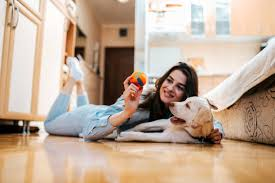

In [ ]:
from PIL import Image

image = Image.open("/content/drive/MyDrive/Simplilearn_Tasks/download.jpg")
image

# **Conditional Generation (Image + Prompt): Preparing Inputs and Generating Caption with Text Prompt**

What:

Defines a text prompt "a photograph of" to guide the caption generation.

The processor processes both the image and the prompt text together into PyTorch tensors (return_tensors="pt").

return_tensors="pt" returns PyTorch tensors

inputs now contains the processed data ready for the model.

Why: This is "conditional generation" - the model uses both the image and the text prompt to generate a caption

In [ ]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[ 1.5362e+00,  1.5362e+00,  1.5654e+00,  ...,  1.7260e+00,
            1.7260e+00,  1.7260e+00],
          [ 1.5362e+00,  1.5362e+00,  1.5654e+00,  ...,  1.7260e+00,
            1.7260e+00,  1.7260e+00],
          [ 1.5070e+00,  1.5216e+00,  1.5362e+00,  ...,  1.7406e+00,
            1.7406e+00,  1.7406e+00],
          ...,
          [ 1.0690e+00,  1.0982e+00,  1.1712e+00,  ...,  7.0407e-01,
            7.0407e-01,  7.0407e-01],
          [ 1.0544e+00,  1.0836e+00,  1.1566e+00,  ...,  6.8947e-01,
            6.8947e-01,  6.8947e-01],
          [ 1.0544e+00,  1.0836e+00,  1.1566e+00,  ...,  6.8947e-01,
            6.8947e-01,  6.8947e-01]],

         [[ 1.5796e+00,  1.6096e+00,  1.6847e+00,  ...,  1.3395e+00,
            1.3395e+00,  1.3395e+00],
          [ 1.5796e+00,  1.6096e+00,  1.6847e+00,  ...,  1.3395e+00,
            1.3395e+00,  1.3395e+00],
          [ 1.5496e+00,  1.5946e+00,  1.6547e+00,  ...,  1.3545e+00,
            1.3545e+00,  1.3545e+00],
   

The next lines Uses the model's .generate() method on the processed inputs to generate output token IDs representing the caption.

out contains the raw model output tokens.

In [ ]:
out = model.generate(**inputs)
out

tensor([[30522,  1037,  9982,  1997,  1037,  2450, 10201,  2006,  1996,  2723,
          2007,  2014,  3899,   102]])

Next: Decode the token IDs back into a readable text string, ignoring special tokens like <pad> or <bos>.

Print the generated caption describing the input image.

In [ ]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a woman laying on the floor with her dog


**Unconditional Generation (Image Only): Generating Caption Without Text Prompt**
This time, only the image is processed without any guiding text prompt.
inputs contains processed image tensors only.

Why: This is "unconditional generation" - the model creates a caption based solely on the image content

In [ ]:
inputs = processor(image,return_tensors="pt")

**The model generates a caption purely from the image content.**

**The caption is decoded and printed.**

In [ ]:
out=model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a woman laying on the floor with a dog


**In Summary**
You install and import the necessary libraries.

Load a pre-trained BLIP image captioning model and corresponding processor.

Load an image from Google Drive.

Prepare inputs for the model using both an optional text prompt and just the image.

Generate captions describing the image.

Display the generated textual description for the image.

In [ ]:
# Configure git (run once)
!git config --global user.email "peace.n.okafor@gmail.com"
!git config --global user.name "peaceokafor"

# Clone your repo
!git clone https://github.com/peaceokafor/peaceokafor.git

# Copy your notebook to the repo
!cp your_notebook.ipynb /content/your-repo/

# Commit and push
%cd /content/your-repo
!git add .
!git commit -m "Update from Colab"
!git push

Cloning into 'peaceokafor'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 4.30 KiB | 4.30 MiB/s, done.
cp: cannot stat 'your_notebook.ipynb': No such file or directory
[Errno 2] No such file or directory: '/content/your-repo'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
